## Gather

In [1261]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

Reading the data from twitter-archive-enhanced.csv:

In [8]:
twitter_arc = pd.read_csv('twitter-archive-enhanced.csv')

In [9]:
consumer_key = 'KJJcn0JTDffDX11wGvHY6vBlh'
consumer_secret = 'lsQ2Q5p8wQ62qLd10HbUfp73Q0h62va3OVWj8QP5z548wZ00rF'
access_token = '1473027210-AZpy8RIFQMNvaCTMIDfPsSZqXNrpVVn2LrOKOOY'
access_secret = 'y1ikxrGUcBHHAyxSxhCSxm2oqZGLUZeDNOpnsQIV97XSt'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

reading data from the twitter API:

In [10]:
tweet_list = twitter_arc['tweet_id']
response_list = []
error_dict = {}

with open('tweet_json.txt','w') as file:
    for tweet in tweet_list:
        try:
            response = api.get_status(tweet, Tweet_mode = 'extended')
            file.write(json.dumps(response._json))
            retweets = response.retweet_count
            favorites = response.favorite_count
            response_list.append({'tweet_id' : tweet,
                                  'retweet_count' : retweets,
                                  'favorite_count' : favorites})            
        except Exception as e:
            print(str(tweet) +": "+str(e))
            error_dict[str(tweet)] = e 

888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921: [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937: [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745: [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329: [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744: [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320: [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130: [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705: [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984: [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648: [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308: [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977: [{'code': 144, 'mess

In [11]:
len(response_list)

2337

In [12]:
twitter_arc.shape[0]

2356

Not for every tweet_id was information available through the api.

In [16]:
df_api = pd.DataFrame(response_list)

Loading file from URL:

In [17]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [18]:
images = pd.read_csv('image-predictions.tsv', delimiter = '\t')

## Assess

In [19]:
twitter_arc.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
346,831926988323639298,8.319030e+17,2.068372e+07,2017-02-15 18:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@UNC can confirm 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
1123,730427201120833536,NaN,NaN,2016-05-11 15:59:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's flawless. Really wants ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730427201...,11,10,Crystal,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
216,850753642995093505,NaN,NaN,2017-04-08 16:54:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Kyle. He made a joke about your shoes,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/850753642...,11,10,Kyle,None,None,None,None
917,756939218950160384,NaN,NaN,2016-07-23 19:49:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jax. He is a majestic mountain pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756939218...,12,10,Jax,None,None,pupper,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
1683,681694085539872773,NaN,NaN,2015-12-29 04:31:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a Benedoop Cumbersnatch. Seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
1457,695095422348574720,NaN,NaN,2016-02-04 04:03:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just a beautiful pupper good shit evol...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695095422...,12,10,just,None,None,pupper,None
256,843981021012017153,NaN,NaN,2017-03-21 00:22:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS DOING A SNOOZE NO SHAME IN A SNOOZE 13/...,NaN,NaN,NaN,https://twitter.com/brianstack153/status/79679...,13,10,None,None,None,None,None


In [20]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
twitter_arc.query('rating_denominator > 10').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [22]:
twitter_arc['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [23]:
twitter_arc.query('rating_denominator > 15')['tweet_id'].count()

16

In [24]:
twitter_arc.query('retweeted_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [25]:
df_api.sample(20)

,favorite_count,retweet_count,tweet_id
585,0,6015,798673117451325440
624,21199,9051,793256262322548741
1674,4091,1931,681302363064414209
1756,14129,6694,678021115718029313
1177,3249,876,717421804990701568
1547,1797,380,688064179421470721
1427,4033,1786,696518437233913856
1831,1193,360,675740360753160193
245,14049,2310,844223788422217728
1489,2019,530,691675652215414786


In [26]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
favorite_count    2337 non-null int64
retweet_count     2337 non-null int64
tweet_id          2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [27]:
df_api.describe()

,favorite_count,retweet_count,tweet_id
count,2337.000000,2337.000000,2.337000e+03
mean,7862.524604,2885.242619,7.420692e+17
std,12186.958140,4874.054913,6.824243e+16
min,0.000000,1.000000,6.660209e+17
25%,1368.000000,581.000000,6.783345e+17
50%,3423.000000,1348.000000,7.185406e+17
75%,9634.000000,3360.000000,7.986825e+17
max,162549.000000,82678.000000,8.924206e+17


In [1316]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1942,861288531465048066,https://pbs.twimg.com/ext_tw_video_thumb/861288473281437696/pu/img/RERGmRgPyaaaB-tB.jpg,1,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True
1572,795076730285391872,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
855,696713835009417216,https://pbs.twimg.com/media/Cas5h-wWcAA3nAc.jpg,1,car_mirror,0.379797,False,Chesapeake_Bay_retriever,0.321589,True,vizsla,0.116931,True
1429,772877495989305348,https://pbs.twimg.com/ext_tw_video_thumb/772874595468795904/pu/img/t8gbjy2rA19xtQYR.jpg,1,tabby,0.218303,False,Norwegian_elkhound,0.138523,True,wombat,0.074217,False
1259,748699167502000129,https://pbs.twimg.com/media/CmPp5pOXgAAD_SG.jpg,1,Pembroke,0.849029,True,Cardigan,0.083629,True,kelpie,0.024394,True


In [889]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Quality
##### `twitter_arc` table
- columns with missing values that are not needed for further analysis: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- columns not needed for further analysis: source
- rating_denominators are sometimes incorrect and should be floats, because they can have decimal places
- rating_numerators are sometimes incorrect and should be floats, because they can have decimal places
- timestamp should be of data type datetime not string
- there shouldn't be any retweets in the table twitter_api
- inconsistent values for the dog stages

##### `df_api` table
- There don't seem to be any errros in this table.

##### `images` table
- There won't be a need for the values for P2 and P3, because P1 is already the one with the highest probability of being correct.
- pictures without any dogs on them

#### Tidiness
- all three tables should be merged into one
- the 4 columns for dog stage should be summed up in one column

## Clean

In [1209]:
tw_clean = twitter_arc.copy()
api_clean = df_api.copy()
im_clean = images.copy()

### Missing Data & other quality issues that should be cleaned before tidying

#### columns/rows with missing values that are not needed for further analysis and there shouldn't be any retweets in the table twitter_api

##### Define
The following columns with missing values are not needed for further analysis:
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp

But since there shouldn't be any retweets in the table, I will clean this issue first.

##### Code

In [1210]:
#Identify the rows with an non-empty retweeted_status_id
retweet_list = tw_clean.query('retweeted_status_id != "NaN"').index.values
len(retweet_list)

181

In [1211]:
#Drop the observations that are retweets
tw_clean.drop(retweet_list, inplace = True)

##### Test

In [1212]:
#Test if no more retweets are in the table
tw_clean[tw_clean['retweeted_status_id'] != "NaN"].count()

tweet_id                      2175
in_reply_to_status_id         78  
in_reply_to_user_id           78  
timestamp                     2175
source                        2175
text                          2175
retweeted_status_id           0   
retweeted_status_user_id      0   
retweeted_status_timestamp    0   
expanded_urls                 2117
rating_numerator              2175
rating_denominator            2175
name                          2175
doggo                         2175
floofer                       2175
pupper                        2175
puppo                         2175
dtype: int64

##### Code

In [1213]:
#Delete columns with only or almost only NaN values.
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
tw_clean.drop(columns = columns, inplace = True)

##### Test

In [1214]:
#Test if the deleted columns are gone
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### Inconsistent values for the dog stages

##### Define

Actually a dog can only have one stage at a time. Therefore only 1 column for the dog stage should be needed. To change this I have to find (and clean) those observations with at least 2 stages first and afterwards cobine the columns into one.

##### Code

In [1215]:
#Find the ones that have the stage doggo and another one
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_colwidth', -1)
tw_clean.query('doggo == "doggo" and (floofer == "floofer" or pupper == "pupper" or puppo == "puppo")')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/75158

- Index No. 191: The text is saying that this is acually a puppo. --> Set the doggo-value to None.
- Index No. 200: After looking at the photo I knew that this was actually about a dog. But as the text says, it's a doggo. --> set the floofer_value to None
- Index No. 460: The text is saying that this is a pupper. --> Change doggo-value to None.
- Index No. 531: Here are two dogs on the picture. --> I decide to copy that obersavtion let one be doggo and one pupper.
- Index No. 565: Also showing two dogs. --> I decide to copy that obersavtion let one be doggo and one pupper.
- Index No. 575: Is showing a pupper. --> Change doggo-value to None.
- Index No. 705: All values that show, if this is a dog are false (p1_dog, p2_dog, p3_dog). And looking at the photo I see that this is a hedgehog. --> Delete Row.
- Index No. 733: Here are two dogs on the picture. --> I decide to copy that obersavtion let one be doggo and one pupper.
- Index No. 889: Here are two dogs on the picture. --> I decide to copy that obersavtion let one be doggo and one pupper.
- Index No. 956: There is actually a doggo on the photo. --> Set pupper to None.
- Index No. 1063: Here are two dogs on the picture. --> I decide to copy that obersavtion let one be doggo and one pupper.
- Index No. 1113: Here are two dogs on the picture. --> I decide to copy that obersavtion let one be doggo and one pupper.

All pictures on which are dogs on two different stages won't need to be copied. This issue will be solved during the cleaning process by using the 'melt'-method.

In [1216]:
#The following code works as can be seen in the test
tw_clean['doggo'][191] = 'None'

C:\Users\elisa\AppData\Local\conda\conda\envs\my env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1217]:
tw_clean['floofer'][200] = 'None'

C:\Users\elisa\AppData\Local\conda\conda\envs\my env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1218]:
tw_clean['doggo'][460] = 'None'

C:\Users\elisa\AppData\Local\conda\conda\envs\my env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1219]:
tw_clean['doggo'][575] = 'None'

C:\Users\elisa\AppData\Local\conda\conda\envs\my env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1220]:
tw_clean['pupper'][956] = 'None'

C:\Users\elisa\AppData\Local\conda\conda\envs\my env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1221]:
tw_clean.drop(labels = 705, axis = 0, inplace = True)

In [1222]:
#Find the ones that have the stage floofer and another one
tw_clean.query('floofer == "floofer" and (pupper == "pupper" or puppo == "puppo")')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1223]:
#Find the ones that have the stage pupper and another one
tw_clean.query('pupper == "pupper" and puppo == "puppo"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Test

In [1224]:
#Test if there are no double entries with at least 'doggo'
tw_clean.query('doggo == "doggo" and (floofer == "floofer" or pupper == "pupper" or puppo == "puppo")')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
733,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,pupper,None
1063,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,just,doggo,None,pupper,None
1113,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",https://twitter.com/dog_rates/status/733109485275860992/photo/1,12,10,None,doggo,None,pupper,None


Only that one have double entries, where I want to have two observation (one for every stage) after using the 'melt'-function to reshape the table.

### Tidiness

#### All three tables should be merged into one

##### Define

All three data frames contain information on the same tweet_ids. Analyse them in this separated tables would make the process more difficult. Therefore I will merge them into one data frame.

##### Code

In [1225]:
#Combining dataframes tw_clean and api_clean
one_df = pd.merge(tw_clean, api_clean, how = 'left', on = 'tweet_id')

#changing the data types of the columns favorite_count and retweet_count back to integer and also filling the NaNs will 0
one_df['favorite_count'].fillna(0, inplace = True)
one_df['retweet_count'].fillna(0, inplace = True)
one_df['favorite_count'] = one_df['favorite_count'].astype(int)
one_df['retweet_count'] = one_df['retweet_count'].astype(int)

##### Test

In [1226]:
one_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 14 columns):
tweet_id              2174 non-null int64
timestamp             2174 non-null object
source                2174 non-null object
text                  2174 non-null object
expanded_urls         2116 non-null object
rating_numerator      2174 non-null int64
rating_denominator    2174 non-null int64
name                  2174 non-null object
doggo                 2174 non-null object
floofer               2174 non-null object
pupper                2174 non-null object
puppo                 2174 non-null object
favorite_count        2174 non-null int32
retweet_count         2174 non-null int32
dtypes: int32(2), int64(3), object(9)
memory usage: 237.8+ KB


##### Code

In [1227]:
#Merging im_clean with one_df
one_df = pd.merge(one_df, im_clean, how = 'inner', on = 'tweet_id')

##### Test

In [1228]:
one_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 25 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null object
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null int64
rating_denominator    1993 non-null int64
name                  1993 non-null object
doggo                 1993 non-null object
floofer               1993 non-null object
pupper                1993 non-null object
puppo                 1993 non-null object
favorite_count        1993 non-null int32
retweet_count         1993 non-null int32
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null floa

#### The 4 columns for dog stage should be summed up in one column

##### Define

Only 1 column for the dog stage should be needed. To change this I have to combine the columns into one using the 'melt'-function.
Since there is no stage-information for every single tweet, I will first add a column for those as well.

##### Code

In [1229]:
#Add column for tweet_ids with no stage information
#The initial value shall be 'none' and the value if there is 'no stage' information shall be 'no stage'
one_df['none'] = str('none')

In [1230]:
for tweet in one_df.iterrows():
    if (tweet[1]['doggo'] != 'doggo') & (tweet[1]['floofer'] != 'floofer') & (tweet[1]['puppo'] != 'puppo') & (tweet[1]['pupper'] != 'pupper'):
        one_df['none'][tweet[0]] = 'no stage'

C:\Users\elisa\AppData\Local\conda\conda\envs\my env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1231]:
#Melt the data frame so that the content of columns 'doggo', 'floofer', 'pupper', 'puppo', 'none' are shown in the column 'stage'
one_df = pd.melt(one_df, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
                                   'rating_numerator', 'rating_denominator', 'name', 'favorite_count',
                                   'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
                                   'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
                  value_vars=['doggo', 'floofer', 'pupper', 'puppo', 'none'])

In [1232]:
#Delete all rows where the stage-value is None
one_df.drop(one_df[one_df['value'] == 'None'].index, inplace = True)

In [1233]:
#Change column name to 'stage' and delete column 'value'
column_names = list(one_df.columns.values)
column_names[-2] = 'stage'
one_df.columns = column_names
one_df.drop(['value'], axis = 1, inplace = True)

In [1234]:
#Change the index-values
one_df.reset_index(drop = True, inplace = True)

##### Test

In [1235]:
one_df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
1366,703631701117943808,2016-02-27 17:24:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bella. Based on this picture she's at least 8ft tall (wow)! Must be rare. 11/10 would pet on tippy toes https://t.co/XTVbSRdvcp,"https://twitter.com/dog_rates/status/703631701117943808/photo/1,https://twitter.com/dog_rates/status/703631701117943808/photo/1,https://twitter.com/dog_rates/status/703631701117943808/photo/1,https://twitter.com/dog_rates/status/703631701117943808/photo/1",11,10,Bella,2693,721,https://pbs.twimg.com/media/CcPNS4yW8AAd-Et.jpg,2,window_shade,0.909533,False,window_screen,0.011427,False,brass,0.008882,False,none
1278,710833117892898816,2016-03-18 14:19:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Sora. She's an Egyptian Pumpernickel. Mesmerizing af. 12/10 would bring home to mom https://t.co/PmTR4kxZkq,https://twitter.com/dog_rates/status/710833117892898816/photo/1,12,10,Sora,2781,559,https://pbs.twimg.com/media/Cd1i8qvUkAE-Jlr.jpg,1,Pembroke,0.803742,True,Cardigan,0.189712,True,German_shepherd,0.001746,True,none
1280,710588934686908417,2016-03-17 22:09:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Beemo. He's a Chubberflop mix. 12/10 would cross the world for https://t.co/kzMVMU8HBV,"https://twitter.com/dog_rates/status/710588934686908417/photo/1,https://twitter.com/dog_rates/status/710588934686908417/photo/1,https://twitter.com/dog_rates/status/710588934686908417/photo/1,https://twitter.com/dog_rates/status/710588934686908417/photo/1",12,10,Beemo,4697,1960,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True,none
2188,668113020489474048,2015-11-21 17:05:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alfie. He's that one hypocritical gym teacher who made you run laps. Great posture. Cool bench. 6/10 https://t.co/GCJzm3YsfX,https://twitter.com/dog_rates/status/668113020489474048/photo/1,6,10,Alfie,667,244,https://pbs.twimg.com/media/CUWdPsqWcAERQVv.jpg,1,Pembroke,0.548896,True,Cardigan,0.191101,True,collie,0.059814,True,none
953,760656994973933572,2016-08-03 02:02:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rose. Her face is stuck like that. 11/10 would pet so heckin well https://t.co/tl3gNYdoq2,"https://twitter.com/dog_rates/status/760656994973933572/photo/1,https://twitter.com/dog_rates/status/760656994973933572/photo/1",11,10,Rose,6929,2054,https://pbs.twimg.com/media/Co5lf-KW8AAIwJw.jpg,1,golden_retriever,0.760546,True,Labrador_retriever,0.232079,True,redbone,0.002874,True,none


### Quality

#### rating_numerators might be incorrect

##### Define

I will use the regex-function to read the actual numerators.

##### Code

In [1236]:
one_df['rating_numerator'] = one_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True).astype(float)

In [1237]:
one_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 22 columns):
tweet_id              2303 non-null int64
timestamp             2303 non-null object
source                2303 non-null object
text                  2303 non-null object
expanded_urls         2303 non-null object
rating_numerator      2303 non-null float64
rating_denominator    2303 non-null int64
name                  2303 non-null object
favorite_count        2303 non-null int32
retweet_count         2303 non-null int32
jpg_url               2303 non-null object
img_num               2303 non-null int64
p1                    2303 non-null object
p1_conf               2303 non-null float64
p1_dog                2303 non-null bool
p2                    2303 non-null object
p2_conf               2303 non-null float64
p2_dog                2303 non-null bool
p3                    2303 non-null object
p3_conf               2303 non-null float64
p3_dog                2303 non-null bo

#### rating_denominators might be incorrect

##### Define

I will use the regex-function to read the actual denominators.

##### Code

In [1238]:
one_df['rating_denominator'] = one_df.text.str.extract('\/(\d+\.?\d+)', expand=True).astype(float)

during the cleaning I found out that the following tweets have wrong ratings:
- Index No. 1109, tweet_id 740373189193256964 --> correct the rating
- Index No. 2282, tweet_id 666287406224695296 --> correct the rating
- Index No. 695, tweet_id 810984652412424192 --> no rating --> delete observation

In [1239]:
one_df.query('tweet_id == 740373189193256964 or tweet_id == 810984652412424192 or tweet_id == 666287406224695296')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
695,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,98.0,Sam,5641,1554,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,none
1109,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9.0,11.0,None,36108,14022,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,none
2282,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1.0,10.0,an,142,63,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,none


In [1240]:
one_df['rating_numerator'][1109] = 14.0
one_df['rating_denominator'][1109] = 10.0
one_df['rating_numerator'][2282] = 9.0
one_df.drop(695, inplace = True)

#Reset index-values:
one_df.reset_index(drop = True, inplace = True)

C:\Users\elisa\AppData\Local\conda\conda\envs\my env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\elisa\AppData\Local\conda\conda\envs\my env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\elisa\AppData\Local\conda\conda\envs\my env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separat

##### Test

In [1241]:
#Test if datatypes are correct
one_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 22 columns):
tweet_id              2302 non-null int64
timestamp             2302 non-null object
source                2302 non-null object
text                  2302 non-null object
expanded_urls         2302 non-null object
rating_numerator      2302 non-null float64
rating_denominator    2302 non-null float64
name                  2302 non-null object
favorite_count        2302 non-null int32
retweet_count         2302 non-null int32
jpg_url               2302 non-null object
img_num               2302 non-null int64
p1                    2302 non-null object
p1_conf               2302 non-null float64
p1_dog                2302 non-null bool
p2                    2302 non-null object
p2_conf               2302 non-null float64
p2_dog                2302 non-null bool
p3                    2302 non-null object
p3_conf               2302 non-null float64
p3_dog                2302 non-null 

In [1242]:
#Look at some sample obersavations if application of regular expression was correct
one_df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
1118,739238157791694849,2016-06-04 23:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,https://twitter.com/dog_rates/status/739238157791694849/video/1,13.0,10.0,None,120128,61211,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,1,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True,none
1314,707969809498152960,2016-03-10 16:42:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Rufus. He's a Honeysuckle Firefox. Curly af. Badass tie. About to go on his first date ever 11/10 good luck pup https://t.co/dGoTWNfIsm,https://twitter.com/dog_rates/status/707969809498152960/photo/1,11.0,10.0,Rufus,2796,1018,https://pbs.twimg.com/media/CdM2xRpXEAUsR4k.jpg,1,toy_poodle,0.908491,True,miniature_poodle,0.082652,True,teddy,0.005786,False,none
2118,669359674819481600,2015-11-25 03:39:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Saydee. She's a Rochester Ecclesiastical. Jumped off cliff and caught stick on way down. 11/10 1st round pick https://t.co/Eh2v0AyJbi,https://twitter.com/dog_rates/status/669359674819481600/photo/1,11.0,10.0,Saydee,370,127,https://pbs.twimg.com/media/CUoLEG3XAAE65I0.jpg,1,Labrador_retriever,0.367818,True,German_short-haired_pointer,0.280642,True,Chesapeake_Bay_retriever,0.184246,True,none
1588,685547936038666240,2016-01-08 19:45:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Everybody needs to read this. Jack is our first 14/10. Truly heroic pupper https://t.co/3m6bNGXWnM,"https://twitter.com/dog_rates/status/685547936038666240/photo/1,https://twitter.com/dog_rates/status/685547936038666240/photo/1",14.0,10.0,None,34201,16580,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False,none
2261,666691418707132416,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Christoper. He is a spotted Penne. Can easily navigate stairs. 8/10 https://t.co/bg4TqvvkuF,https://twitter.com/dog_rates/status/666691418707132416/photo/1,8.0,10.0,Christoper,186,47,https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg,1,German_shepherd,0.975401,True,beagle,0.008687,True,bloodhound,0.005394,True,none


In [1243]:
#Check if the 3 error are corrected
one_df.query('tweet_id == 740373189193256964 or tweet_id == 810984652412424192 or tweet_id == 666287406224695296')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
1108,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14.0,10.0,None,36108,14022,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,none
2281,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9.0,10.0,an,142,63,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,none


#### Observations, that are not even dogs

##### Define

If the contents of 'p1_dog', 'p2_dog' and 'p3_dog' are 'False' and the 'rating_numerator' is smaller than 10, this tweet will probably not show a dog and the observation should be deleted. 

##### Code

In [1244]:
one_df[(one_df['p1_dog'] == False) & (one_df['p2_dog'] == False) & (one_df['p3_dog'] == False) & (one_df['rating_numerator'] < 10)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
44,768193404517830656,2016-08-23 21:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq,https://twitter.com/dog_rates/status/768193404517830656/photo/1,8.0,10.0,Gerald,11454,3799,https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg,1,lion,0.396984,False,ram,0.300851,False,cheetah,0.094474,False,doggo
123,750506206503038976,2016-07-06 01:46:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Malcolm. He's absolutely terrified of heights. 8/10 hang in there pupper https://t.co/SVU00Sc9U2,https://twitter.com/dog_rates/status/750506206503038976/photo/1,8.0,10.0,Malcolm,4638,1216,https://pbs.twimg.com/media/CmpVaOZWIAAp3z6.jpg,1,American_black_bear,0.219166,False,lesser_panda,0.214715,False,titi,0.091685,False,pupper
178,696877980375769088,2016-02-09 02:07:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Misty. She's in a predicament. Not sure what next move should be. 9/10 stay calm pupper I'm comin https://t.co/XhR7PAgcwF,https://twitter.com/dog_rates/status/696877980375769088/photo/1,9.0,10.0,Misty,2527,744,https://pbs.twimg.com/media/CavO0uuWEAE96Ed.jpg,1,space_heater,0.206876,False,spatula,0.123450,False,vacuum,0.119218,False,pupper
185,693590843962331137,2016-01-31 00:25:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Phil. He's big af. Currently destroying this nice family home. Completely uncalled for. 3/10 not a good pupper https://t.co/fShNNhBWYx,https://twitter.com/dog_rates/status/693590843962331137/photo/1,3.0,10.0,Phil,5245,2076,https://pbs.twimg.com/media/CaAhMb1XEAAB6Bz.jpg,1,dining_table,0.383448,False,grey_fox,0.103191,False,Siamese_cat,0.098256,False,pupper
191,692417313023332352,2016-01-27 18:42:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https://t.co/VGaIMktX10,https://twitter.com/dog_rates/status/692417313023332352/photo/1,7.0,10.0,Herschel,9683,3660,https://pbs.twimg.com/media/CZv13u5WYAA6wQe.jpg,1,bison,0.208922,False,mink,0.169945,False,polecat,0.144494,False,pupper
197,688894073864884227,2016-01-18 01:22:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Hamrick. He's covered in corn flakes. Silly pupper. Looks congested. 7/10 considerably petable https://t.co/ROPZcAMQKI,https://twitter.com/dog_rates/status/688894073864884227/photo/1,7.0,10.0,Hamrick,2323,733,https://pbs.twimg.com/media/CY9xf1dUAAE4XLc.jpg,1,hog,0.669996,False,guinea_pig,0.077347,False,hamster,0.062398,False,pupper
210,685667379192414208,2016-01-09 03:40:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Marty. He has no idea what happened here. Never seen this stuff in his life. 9/10 very suspicious pupper https://t.co/u427woxFpJ,https://twitter.com/dog_rates/status/685667379192414208/photo/1,9.0,10.0,Marty,2433,603,https://pbs.twimg.com/media/CYP62A6WkAAOnL4.jpg,1,sliding_door,0.344526,False,doormat,0.190027,False,washbasin,0.046326,False,pupper
215,684880619965411328,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a basking dino pupper. Looks powerful. Occasionally shits eggs. Doesn't want the holidays to end. 5/10 https://t.co/DnNweb5eTO,https://twitter.com/dog_rates/status/684880619965411328/photo/1,5.0,10.0,None,2183,867,https://pbs.twimg.com/media

In [1245]:
one_df.drop(one_df[(one_df['p1_dog'] == False) & (one_df['p2_dog'] == False) & (one_df['p3_dog'] == False) & (one_df['rating_numerator'] < 10)].index.values, inplace = True)

##### Test

In [1246]:
#Check, if there are no pictures without dogs in the dataframe anymore.
one_df[(one_df['p1_dog'] == False) & (one_df['p2_dog'] == False) & (one_df['p3_dog'] == False) & (one_df['rating_numerator'] < 10)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage


#### Columns not needed for further analysis

##### Define

The following columns are not needed for further analysis and can therefore be deleted:
- source
- p2
- p2_conf
- p2_dog
- p3
- p3_conf
- p3_dog

##### Code

In [1247]:
one_df.drop(['source', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

##### Test

In [1248]:
one_df.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,stage
0,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10.0,Cassie,31027,7126,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,doggo


#### timestamp should be of data type datetime not string

##### Define

I will change the data type of timestamp from string to datetime

##### Code

In [1249]:
#Change the data type of 'timestamp'
one_df['timestamp'] = one_df['timestamp'].astype('datetime64')

##### Test

In [1250]:
#Check if the change was successful
one_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2301
Data columns (total 15 columns):
tweet_id              2151 non-null int64
timestamp             2151 non-null datetime64[ns]
text                  2151 non-null object
expanded_urls         2151 non-null object
rating_numerator      2151 non-null float64
rating_denominator    2151 non-null float64
name                  2151 non-null object
favorite_count        2151 non-null int32
retweet_count         2151 non-null int32
jpg_url               2151 non-null object
img_num               2151 non-null int64
p1                    2151 non-null object
p1_conf               2151 non-null float64
p1_dog                2151 non-null bool
stage                 2151 non-null object
dtypes: bool(1), datetime64[ns](1), float64(3), int32(2), int64(2), object(6)
memory usage: 237.4+ KB


In [1251]:
one_df.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,stage
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10.0,Cassie,31027,7126,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,doggo


#### Save cleaned dataframe to csv

In [1252]:
one_df.to_csv('twitter_archive_master.csv')

## Insights and visualizations

### What are the highest ratings?

To analyse this I will have to add a column for the relative rating, since the denominator is not always 10.

In [1253]:
one_df['relative_rating'] = one_df['rating_numerator']/one_df['rating_denominator']

In [1279]:
best = one_df[one_df['relative_rating'] >= 1.4]
best.sort_values(['relative_rating'], ascending = False)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,stage,relative_rating
1034,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,5326,2606,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,none,177.6
2026,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,None,24678,8856,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,none,42.0
642,819006400881917954,2017-01-11 02:21:57,This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,"https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1",14.0,10.0,Sunny,47590,20432,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,none,1.4
475,851464819735769094,2017-04-10 16:00:07,This is Iggy. He was a rescue dog killed in the Stockholm attack. His memorial started with a collar and four bones. It's grown a bit. 14/10 https://t.co/E4a0R9my1M,"https://twitter.com/dog_rates/status/851464819735769094/photo/1,https://twitter.com/dog_rates/status/851464819735769094/photo/1,https://twitter.com/dog_rates/status/851464819735769094/photo/1,https://twitter.com/dog_rates/status/851464819735769094/photo/1",14.0,10.0,Iggy,24726,7326,https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg,2,web_site,0.919649,False,none,1.4
516,841439858740625411,2017-03-14 00:04:30,Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL,"https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1",14.0,10.0,None,13055,3879,https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg,3,military_uniform,0.853684,False,none,1.4
563,832273440279240704,2017-02-16 17:00:25,Say hello to Smiley. He's a blind therapy doggo having a h*ckin blast high steppin around in the snow. 14/10 would follow anywhere https://t.co/SHAb1wHjMz,https://twitter.com/dog_rates/status/832273440279240704/video/1,14.0,10.0,Smiley,11781,2483,https://pbs.twimg.com/ext_tw_video_thumb/832273373149413377/pu/img/qOqxM0b48fEarmq6.jpg,1,Pembroke,0.134081,True,none,1.4
566,831911600680497154,2017-02-15 17:02:36,Meet Kuyu. He was trapped in a well for 10 days. Rescued yesterday using a device designed by a local robotics team. 14/10 for all involved https://t.co/l38R6IZNNg,"https://twitter.com/dog_rates/status/831911600680497154/photo/1,https://twitter.com/dog_rates/status/831911600680497154/photo/1,https://twitter.com/dog_rates/status/831911600680497154/photo/1,https://twitter.com/dog_rates/status/831911600680497154/photo/1",14.0,10.0,Kuyu,28842,6947,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg,4,bloodhound,0.777562,True,none,1.4
585,828650029636317184,2017-02-06 17:02:17,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK","https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14.0,10.0,one,9927,1440,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1,golden_retriever,0.649209,True,none,1.4
588,828381636999917570,2017-02-05 23:15:47,Meet Doobert. He's a deaf doggo. Didn't stop him on the field tho. Absol

The picture with the highest rating received a numerator of 1776. This might first seem like an error. But actually you can see a dog celebrating the Independence Day.

### How are the dog stages distributed?

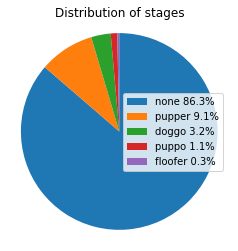

In [1338]:
sorted_counts = one_df['stage'].value_counts()
labels = ['none 86.3%', 'pupper 9.1%', 'doggo 3.2%', 'puppo 1.1%', 'floofer 0.3%']
plt.pie(sorted_counts, startangle = 90, counterclock = False)
plt.axis('square');
plt.legend(loc = 'right', labels = labels);
plt.title('Distribution of stages');

Most of the tweets don't include any stage at all. But if we are only looking at the one with a stage, 'pupper' is the most common one.

### Is there a relation between high retweet numbers and high favorite numbers?

In [1309]:
#Define 'high' and 'low' favorite numbers
mean = one_df['favorite_count'].mean()
high = one_df[one_df['favorite_count'] >= mean]
low = one_df[one_df['favorite_count'] <= mean]
mean

9387.138075313807

In [1310]:
#Find the mean of retweet numbers for the respective rating
print(high['retweet_count'].mean())
print(low['retweet_count'].mean())

6987.220520673814
1076.233644859813


Tweets with high favoite numbers have higher retweet numbers on average. This applies only for this sample data frame.
One can see this relation also in a scatter plot.

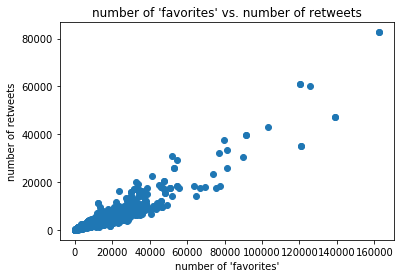

In [1343]:
#Produce scaterplot
plt.scatter(one_df['favorite_count'], one_df['retweet_count']);
plt.xlabel("number of 'favorites'")
plt.ylabel('number of retweets')
plt.title("number of 'favorites' vs. number of retweets");

### What is the average rating per dog stage?

In [1314]:
one_df.groupby('stage')['relative_rating'].mean()

stage
doggo      1.182609
floofer    1.200000
none       1.205608
pupper     1.095523
puppo      1.204348
Name: relative_rating, dtype: float64

## Resources

I only went looking for help in the knowlegde section of udacity.